In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

# Path where the data should be located
path = '/content/drive/My Drive/Colab Notebooks/IE534_ImageCaptioning/Data'
os.chdir(path)

In [3]:
from pycocotools.coco import COCO 

import torch
from torchvision import datasets, transforms
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import os
from datetime import datetime


batch_size = 1

data_transforms = {
    'train': transforms.Compose([
                                 transforms.Resize([224, 224]),
                                 transforms.ToTensor(),
                                 #transforms.Normalize(mean = [ 0.485, 0.456, 0.406 ], std = [ 0.229, 0.224, 0.225 ])
                                 ]),

    'val': transforms.Compose([
                               transforms.Resize([224, 224]),
                               transforms.ToTensor(),
                               #transforms.Normalize(mean = [ 0.485, 0.456, 0.406 ], std = [ 0.229, 0.224, 0.225 ])
                               ])
                   }


trainset = datasets.CocoCaptions(root=os.path.join(path, 'train2017/'), annFile = os.path.join(path, 'annotations/captions_train2017.json'), transform=data_transforms['train'])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

valset = datasets.CocoCaptions(root=os.path.join(path, 'val2017/'), annFile = os.path.join(path, 'annotations/captions_val2017.json'), transform=data_transforms['val'])
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=True, num_workers=4)


loading annotations into memory...
Done (t=3.36s)
creating index...
index created!
loading annotations into memory...
Done (t=1.37s)
creating index...
index created!


In [0]:
iterator = iter(valloader)

image, target = next(iterator)



In [5]:
target

[('A group of people riding horses down a small road.',),
 ('People are riding their horses in the parade.',),
 ('A group of people are riding horses at a park.',),
 ('A large crowd of people riding horses walks along a trail.',),
 ('A group of riders on horses in a field.',)]

In [6]:
image.shape

torch.Size([1, 3, 224, 224])

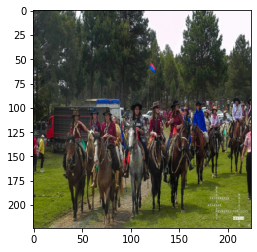

In [7]:
plt.imshow(image.squeeze().permute(1, 2, 0))